# CAPSTONE Project: Wine quality classification

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, re, time
import numpy as np
import scipy as sp
import scipy.sparse
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


from tqdm import tqdm_notebook

pd.set_option('display.max_columns', 50)

# LOAD DATA
- https://archive.ics.uci.edu/ml/datasets/Wine
- All attributes are continuous: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline
- NOTE: 1st attribute is class identifier (1-3)

In [3]:
project_root = ''

In [4]:
col_names = ["Class", "Alcohol", "Malic_acid", "Ash",\
"Alcalinity of ash", "Magnesium", "Total phenols",\
"Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",\
"Color intensity", "Hue",  "OD280/OD315 of diluted wines", "Proline",\
]


In [5]:
len(col_names)

14

In [6]:
df = pd.read_csv(os.path.join(project_root, 'wine.data'), sep=',', names=col_names)

In [7]:
df.head(n=7)

Class  Alcohol  Malic_acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   
5      1    14.20        1.76  2.45               15.2        112   
6      1    14.39        1.87  2.45               14.6         96   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735  
5             6.75  1.05                          2.85     1450  
6             5.25  1.02                          3.58     1290

In [8]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [9]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [10]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [12]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
df.assign(quality=c).head()

Class  Alcohol  Malic_acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  quality  
0             5.64  1.04                          3.92     1065  Class 1  
1             4.38  1.05                          3.40     1050  Class 1  
2             5.68  1.03                          3.17     1185  Class 1  
3             7.80  0.86                          3.45     1480  Class 1  
4             4.32  1.04                          2.93      735  Class 1

In [13]:
df.assign(quality=c).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [14]:
df.assign(quality=c).describe(include=object)

quality
count       178
unique        3
top     Class 2
freq         71

In [15]:
df.describe()

Class     Alcohol  Malic_acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [16]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

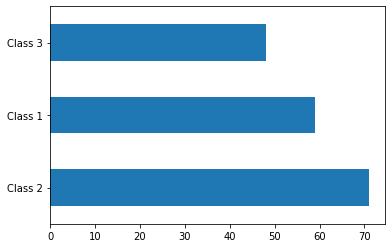

In [17]:
df['Class'].value_counts()\
.rename(index={1:'Class 1', 2:'Class 2', 3:'Class 3'})\
.plot(kind='barh')

## Exploratory data analysis I

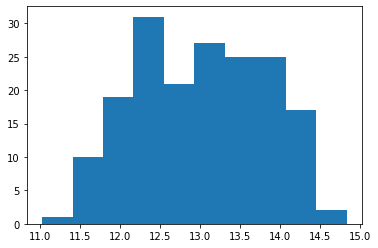

In [18]:
#sns.set_style("white")
df['Alcohol'].hist(grid=False)

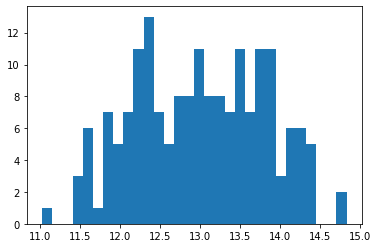

In [19]:
df['Alcohol'].hist(bins=30, grid=False)

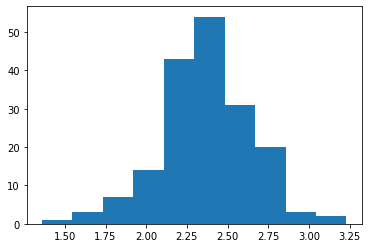

In [20]:
#sns.set_style("white")
df['Ash'].hist(grid=False)

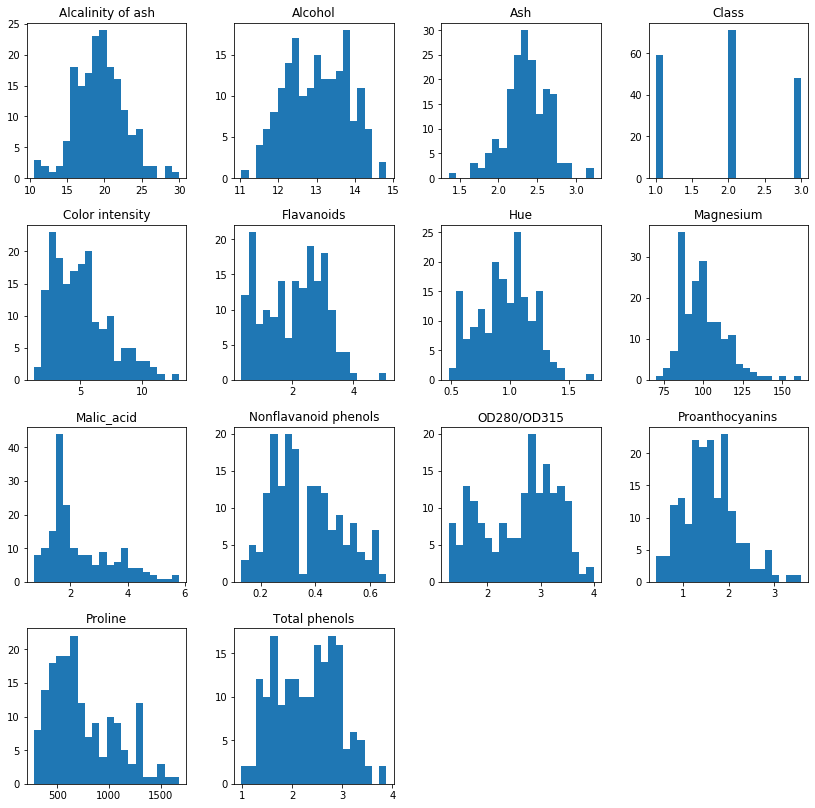

In [21]:
axes = df.rename(columns={'OD280/OD315 of diluted wines': 'OD280/OD315'})\
.hist(grid=False, figsize=[14,14], bins=20)

### seaborn for visualization
- https://seaborn.pydata.org/index.html

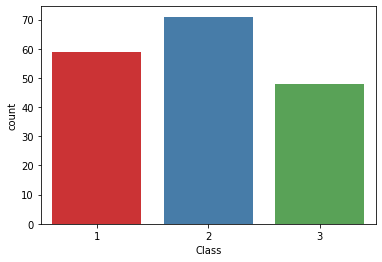

In [22]:
sns.countplot(df['Class'], palette='Set1')

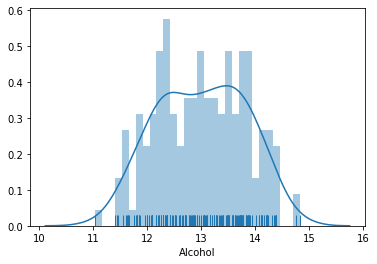

In [23]:
ax = sns.distplot(df['Alcohol'], rug=True, bins=30)
#da smo stavili False nestaje tepih

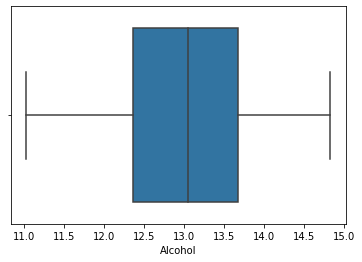

In [24]:
ax = sns.boxplot(x=df["Alcohol"])
#dobar prikaz kad nije normalna distribucija--> 
#imamo drugačiji mean i median
#ovo iznad 13 je median
#12.5 (25%) i 13.5 su percentili
#vertikalne linije su percentili 0,25,50,75,100

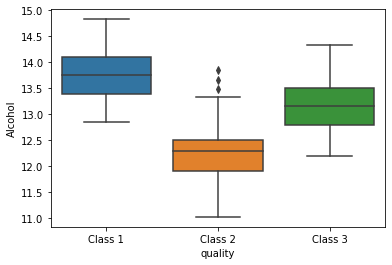

In [25]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
ax = sns.boxplot(x='quality', y='Alcohol', data=df.assign(quality=c))

#samo u drugoj klasi pronađeni su outlieri (ove tri točkice)

## Exploratory data analysis II

In [26]:
df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

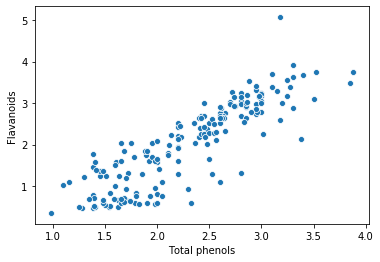

In [27]:
ax = sns.scatterplot(x="Total phenols", y="Flavanoids",data=df)


In [28]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [29]:
c

0      Class 1
1      Class 1
2      Class 1
3      Class 1
4      Class 1
        ...   
173    Class 3
174    Class 3
175    Class 3
176    Class 3
177    Class 3
Name: Class, Length: 178, dtype: object

In [30]:
df['Class']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [98]:
df.head()


Class  Alcohol  Malic_acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

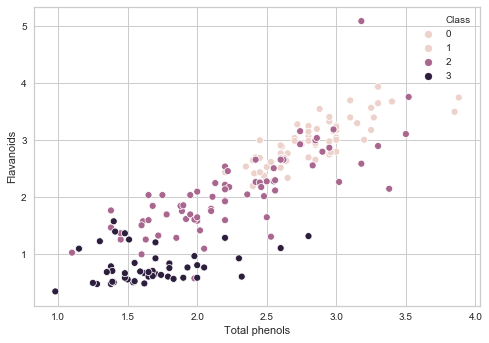

In [99]:
ax = sns.scatterplot(x="Total phenols", y="Flavanoids", hue="Class", \
            data=df)
#tu mogu bilokoju zavisnost interpretirati

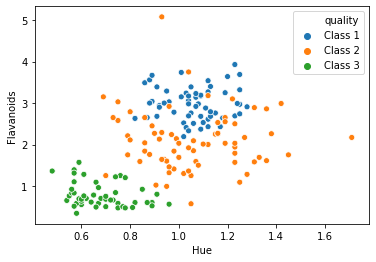

In [38]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
ax = sns.scatterplot(x="Hue", y="Flavanoids", hue="quality", \
            data=df.assign(quality=c))
#probaj razne varijacije

#flavanoid dvojka dobro razdvaja vina prve i treće klase

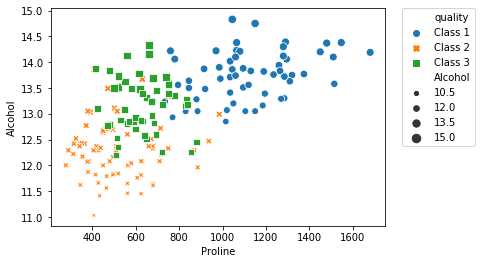

In [47]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
ax = sns.scatterplot(x="Proline", y="Alcohol", \
                     size='Alcohol', \
                     hue='quality', \
                     style='quality',
                     data=df.assign(quality=c))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#hue predstavlja boju
#style predstavlja križić ili kružić itd

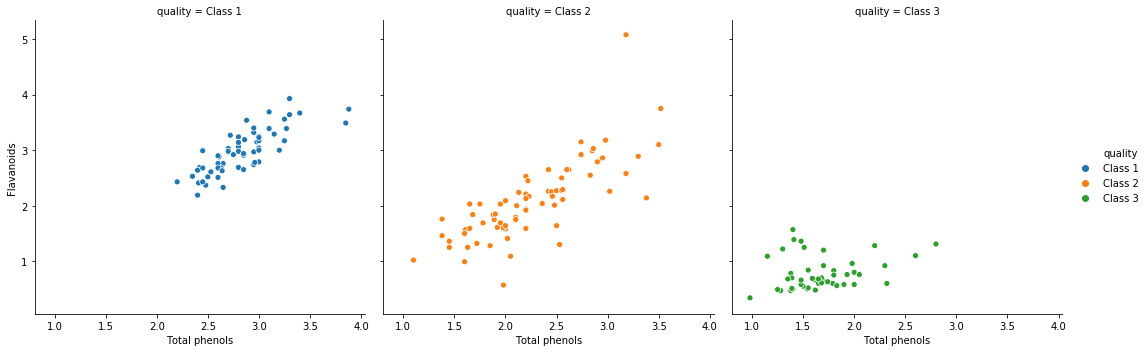

In [29]:
g = sns.relplot(x="Total phenols", y="Flavanoids", hue="quality",
                col="quality", data=df.assign(quality=c))

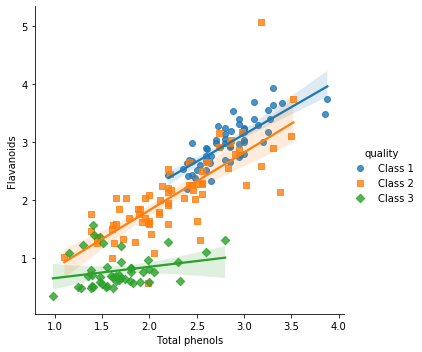

In [30]:
g = sns.lmplot(x="Total phenols", y="Flavanoids", \
               hue="quality", markers=["o", 's', "D"],\
               data=df.assign(quality=c))
#0 je kružić, s je square and d je diamond
#linija predstavlja korelaciju odnosno regresijski pravac

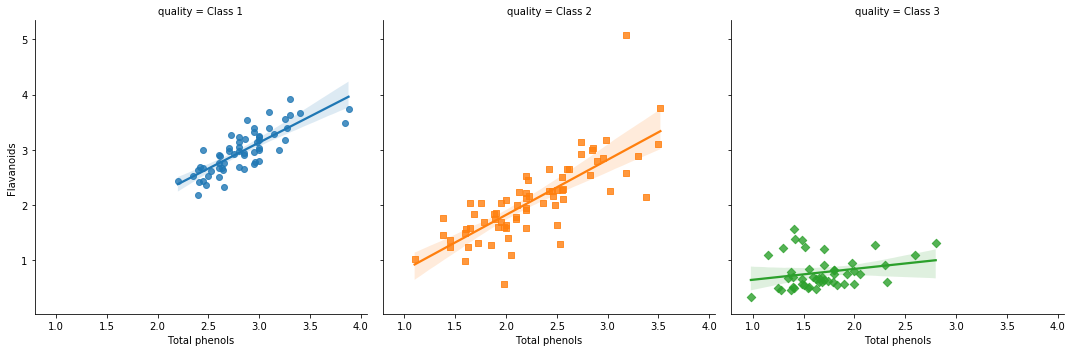

In [31]:
g = sns.lmplot(x="Total phenols", y="Flavanoids", \
               hue="quality", markers=["o", 's', "D"],\
               data=df.assign(quality=c), col='quality')

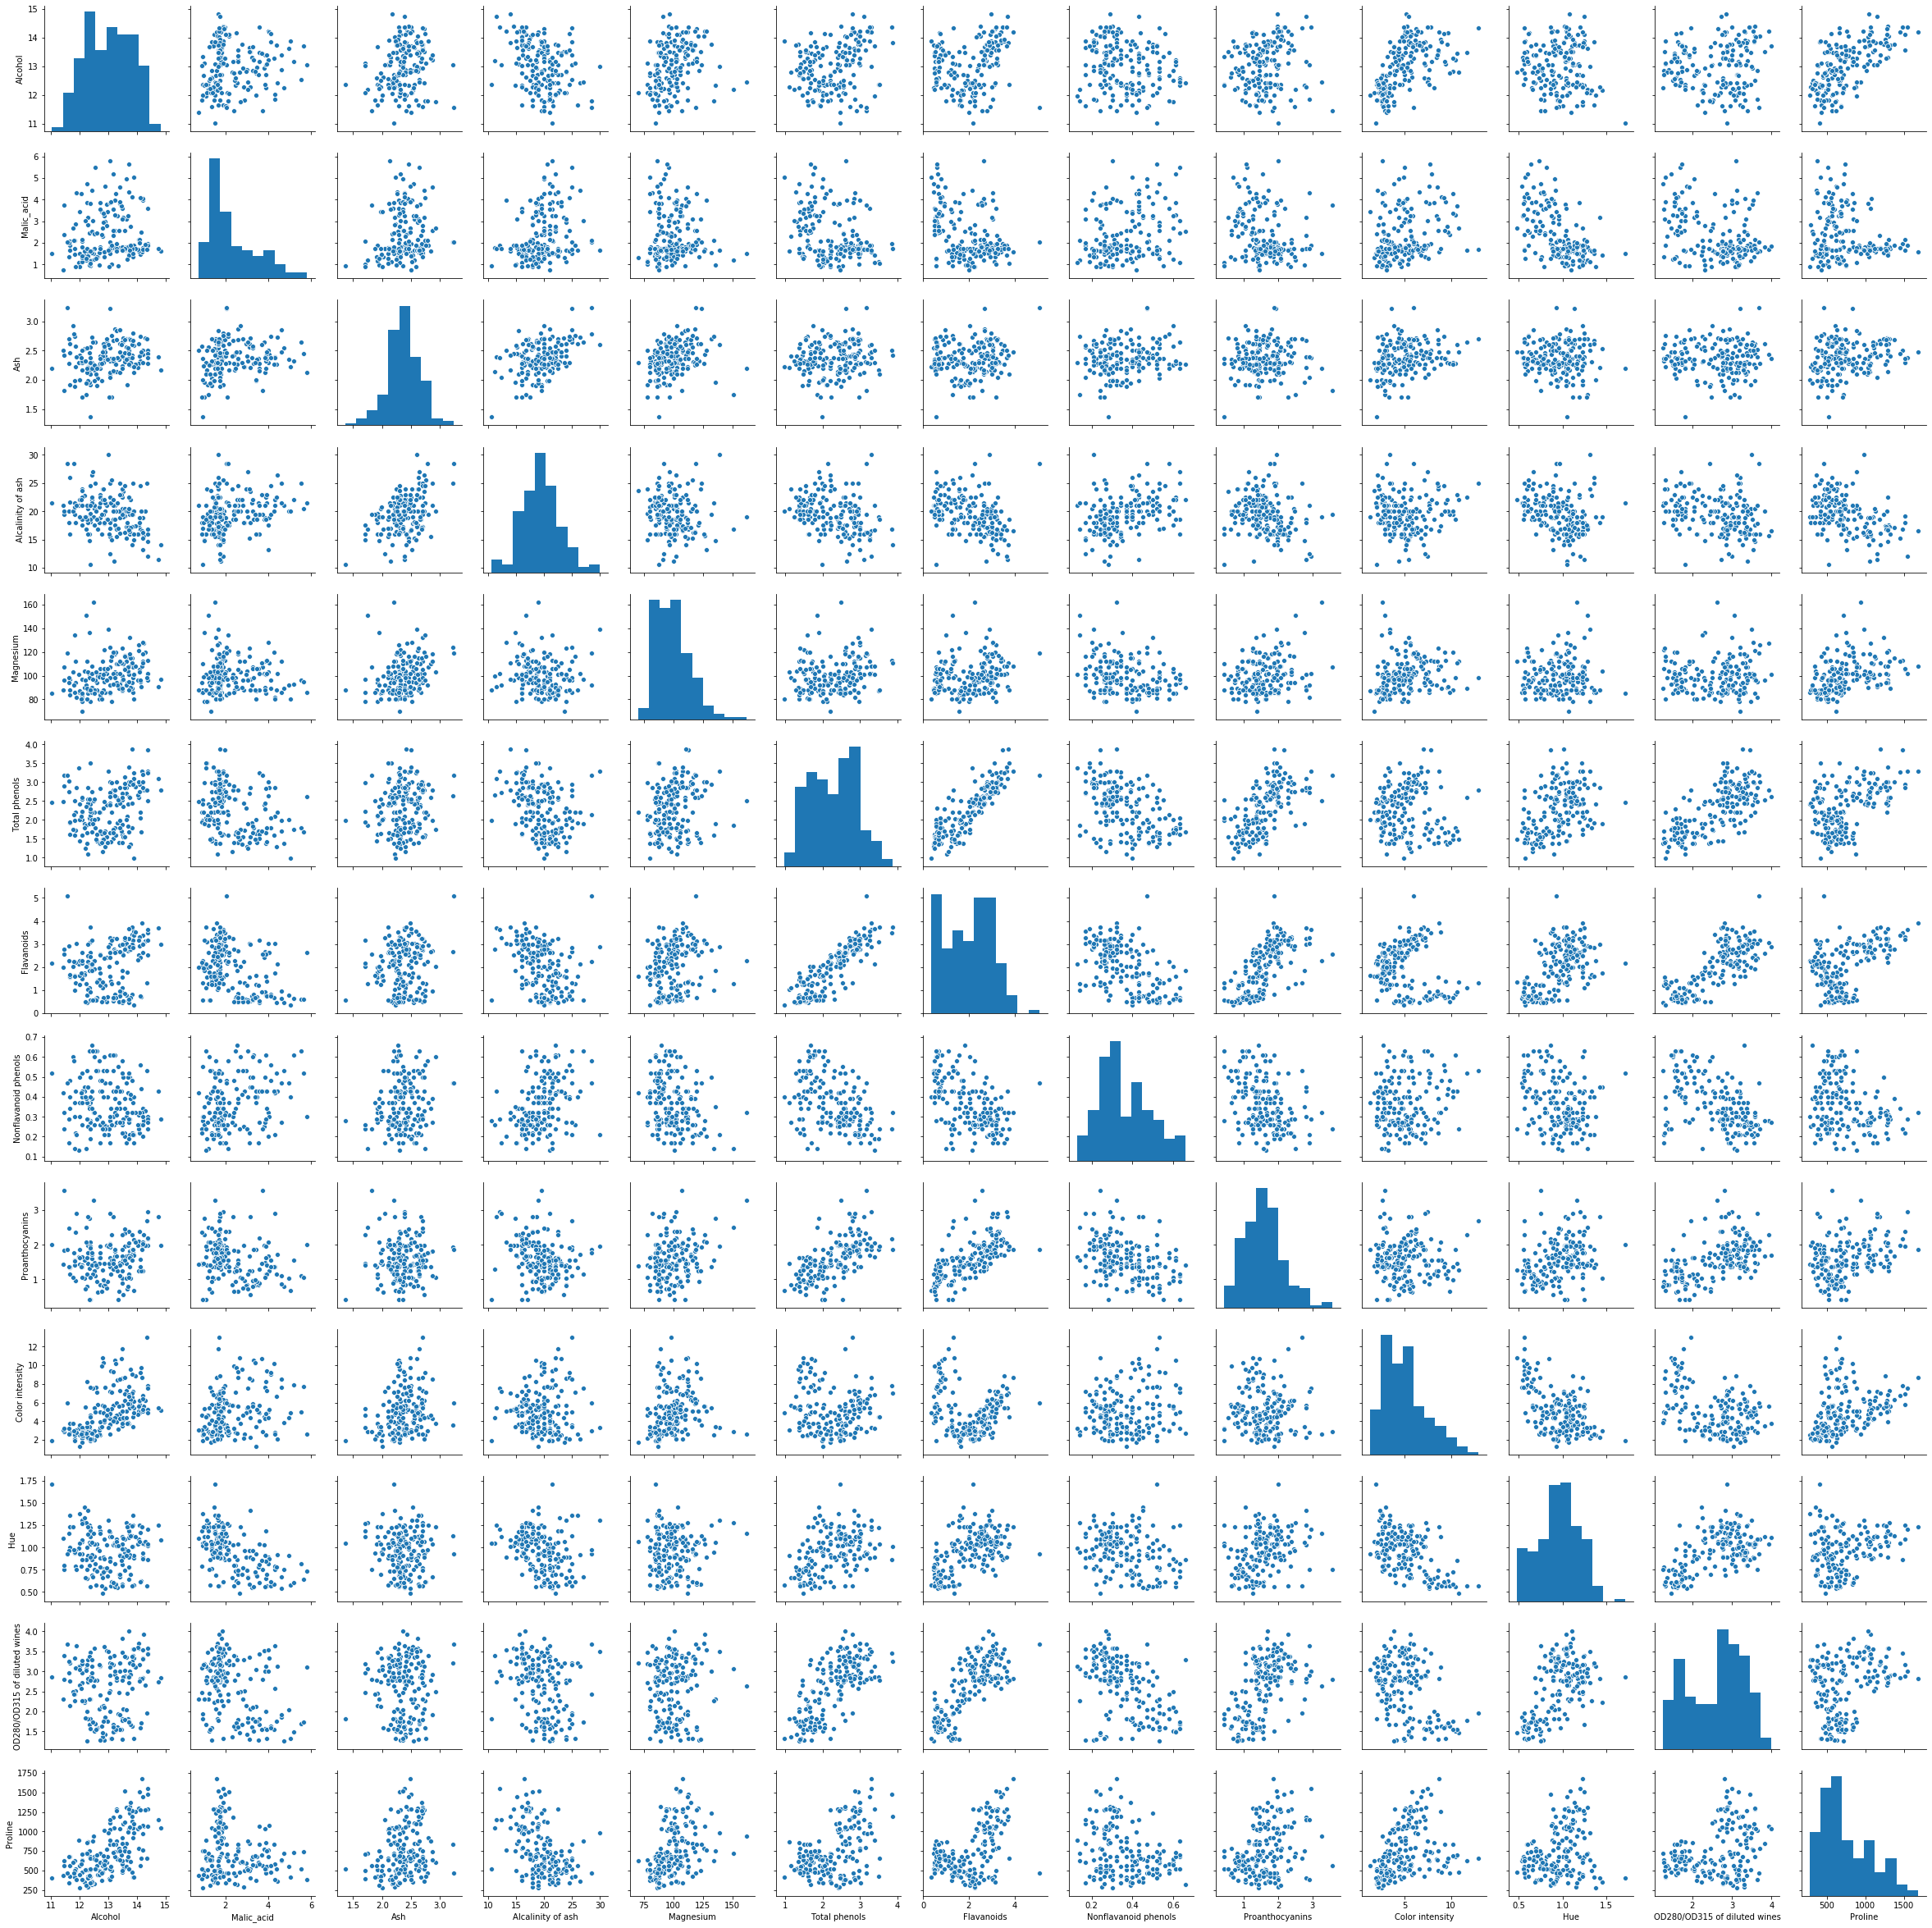

In [32]:
g = sns.pairplot(df[col_names[1:]])
#sve moguće kombinacije

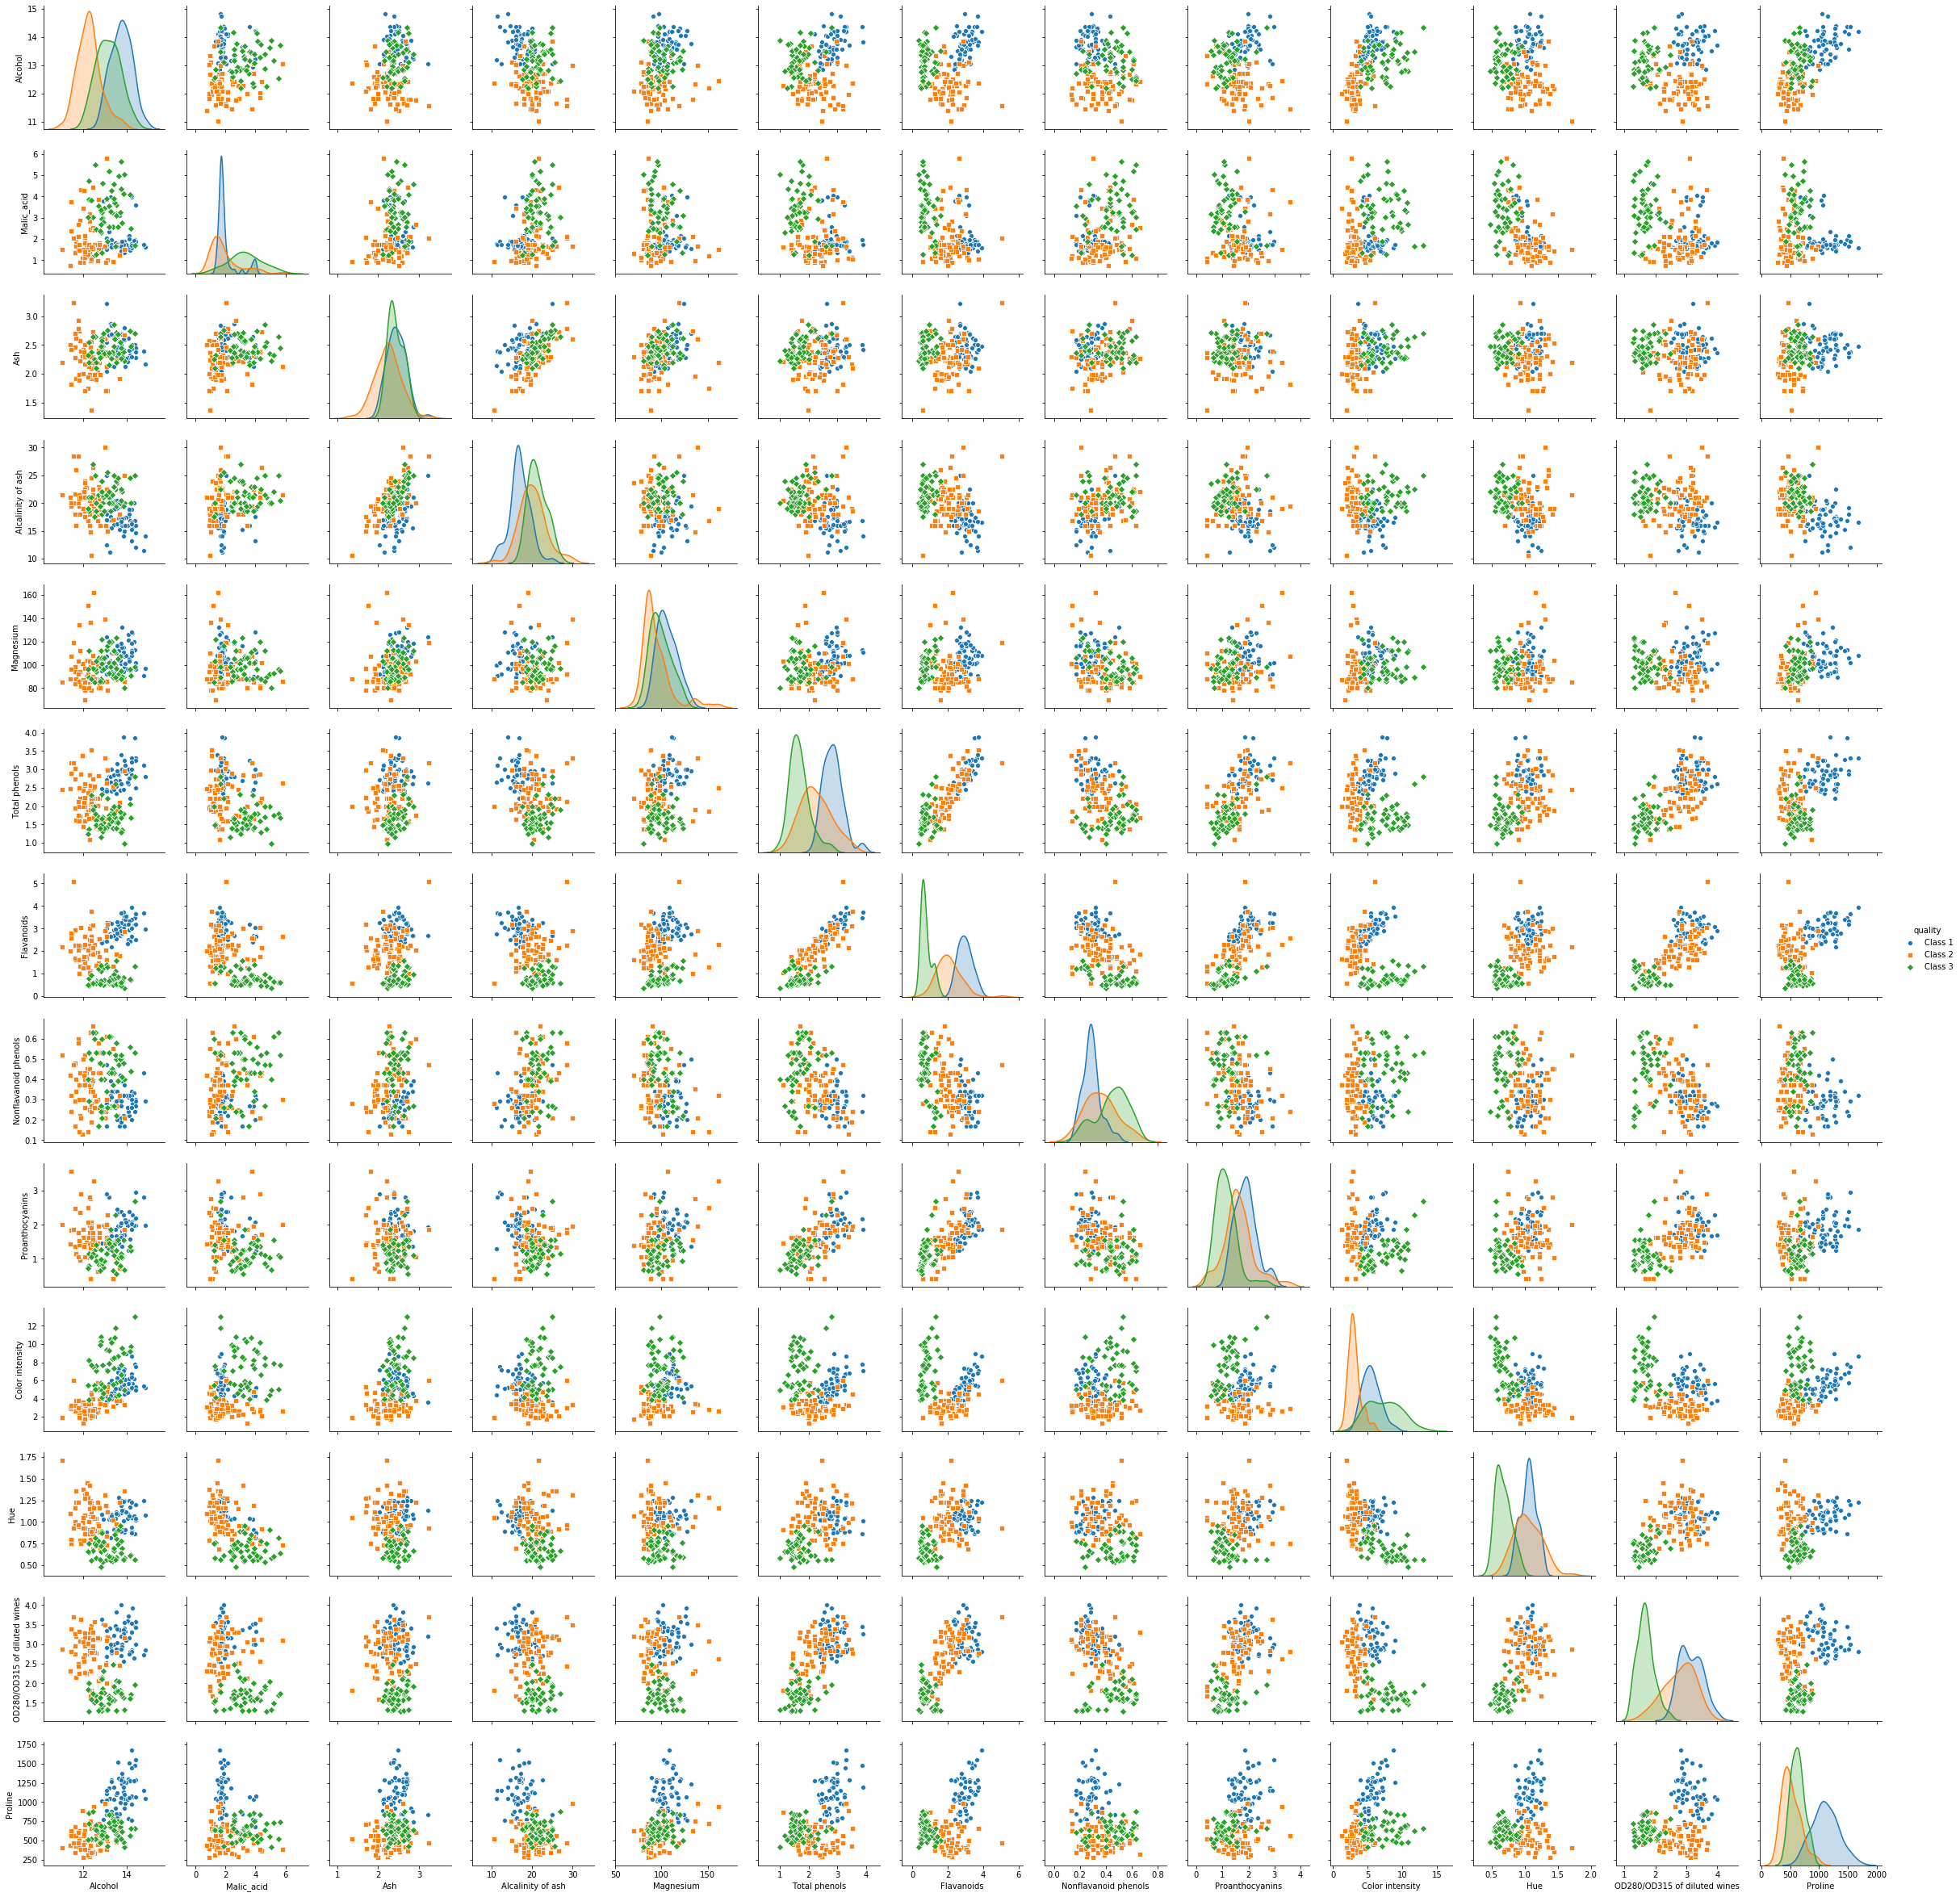

In [33]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
g = sns.pairplot(df[col_names[1:]].assign(quality=c),\
                 hue='quality',
                 markers=["o", "s", "D"])
#tu smo ih obojali prema klasi

In [34]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

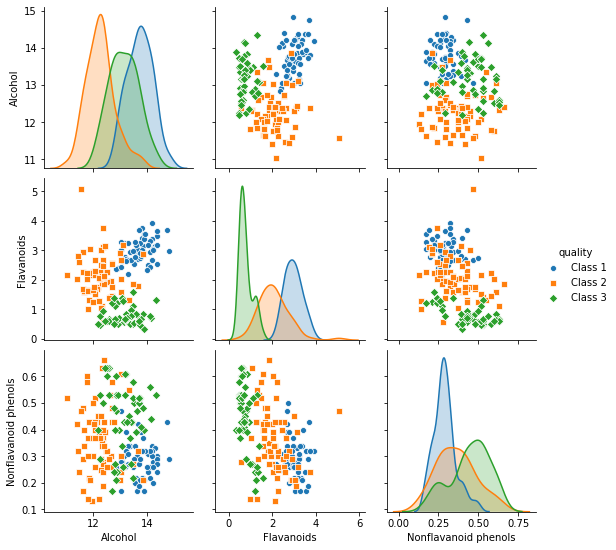

In [50]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
g = sns.pairplot(df[col_names[1:]].assign(quality=c),\
                 hue='quality',\
                 markers=["o", "s", "D"],\
                vars=['Alcohol', 'Flavanoids', 'Nonflavanoid phenols'])
#pod vars probaj mijenjat varijable

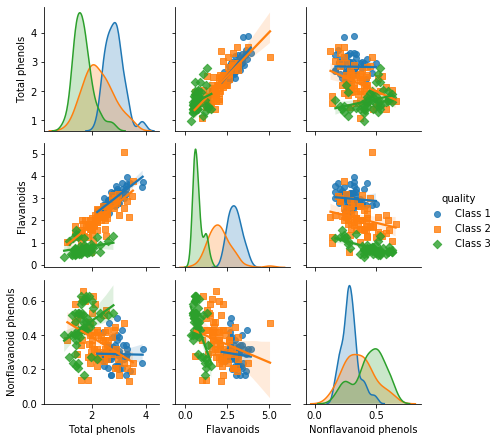

In [51]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
g = sns.pairplot(df[col_names[1:]].assign(quality=c),\
                 kind='reg',\
                 height=2,\
                 hue='quality',\
                 markers=["o", "s", "D"],\
                vars=['Total phenols', 'Flavanoids', 'Nonflavanoid phenols'])

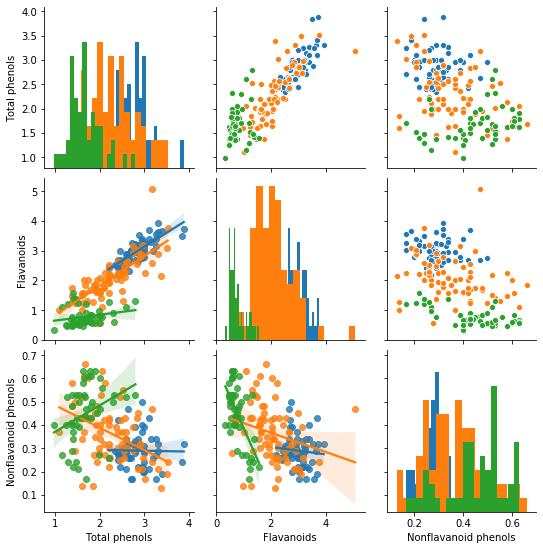

In [52]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
g = sns.PairGrid(df.assign(quality=c), hue="quality",\
                 vars=['Total phenols', 'Flavanoids', 'Nonflavanoid phenols'])
g = g.map_upper(sns.scatterplot, )
g = g.map_lower(sns.regplot)
g = g.map_diag(plt.hist, bins=20)

In [53]:
corr_mat = df.rename(columns={'OD280/OD315 of diluted wines':'OD280/OD315'}).corr()

In [54]:
corr_mat.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

In [55]:
corr_mat.head()

Class   Alcohol  Malic_acid       Ash  \
Class              1.000000 -0.328222    0.437776 -0.049643   
Alcohol           -0.328222  1.000000    0.094397  0.211545   
Malic_acid         0.437776  0.094397    1.000000  0.164045   
Ash               -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash  0.517859 -0.310235    0.288500  0.443367   

                   Alcalinity of ash  Magnesium  Total phenols  Flavanoids  \
Class                       0.517859  -0.209179      -0.719163   -0.847498   
Alcohol                    -0.310235   0.270798       0.289101    0.236815   
Malic_acid                  0.288500  -0.054575      -0.335167   -0.411007   
Ash                         0.443367   0.286587       0.128980    0.115077   
Alcalinity of ash           1.000000  -0.083333      -0.321113   -0.351370   

                   Nonflavanoid phenols  Proanthocyanins  Color intensity  \
Class                          0.489109        -0.499130         0.265668   
Alcohol                       -0.155929         0.136698         0.546364   
Malic_acid                     0.292977        -0.220746         0.248985   
Ash                            0.186230         0.009652         0.258887   
Alcalinity of ash              0.361922        -0.197327         0.018732   

                        Hue  OD280/OD315   Proline  
Class             -0.617369    -0.788230 -0.633717  
Alcohol           -0.071747     0.072343  0.643720  
Malic_acid        -0.561296    -0.368710 -0.192011  
Ash               -0.074667     0.003911  0.223626  
Alcalinity of ash -0.273955    -0.276769 -0.440597

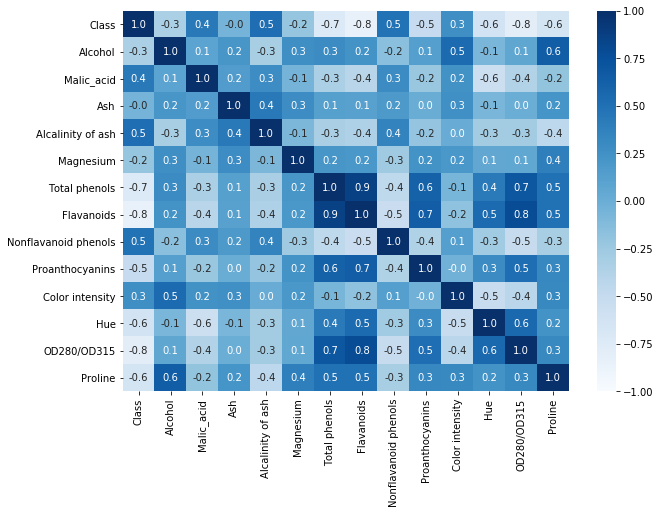

In [56]:
plt.figure(figsize=[10, 7])
ax = sns.heatmap(data=corr_mat, annot=True, fmt='0.1f', vmin=-1.0, vmax=1.0, center=0.0,\
                 xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, cmap="Blues")

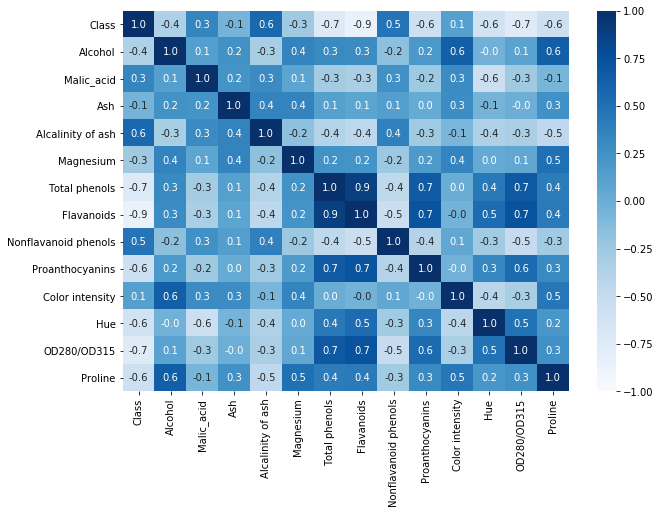

In [57]:
plt.figure(figsize=[10, 7])
ax = sns.heatmap(data=df.corr(method='spearman'), \
                 annot=True, fmt='0.1f', vmin=-1.0, vmax=1.0, center=0.0,\
                 xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, cmap="Blues")
#spearman je druga metoda računanja i brojevi su malo drugačiji

In [58]:
def plot_features_correlation(df, fs = [10, 7]):
    plt.figure(figsize=fs)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    #sns.set(font_scale=1)
    corr_mat = df.corr()
    ax = sns.heatmap(data=corr_mat, annot=True, fmt='0.1f', vmin=-1.0, vmax=1.0, center=0.0,\
                     xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, cmap="Blues")
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])

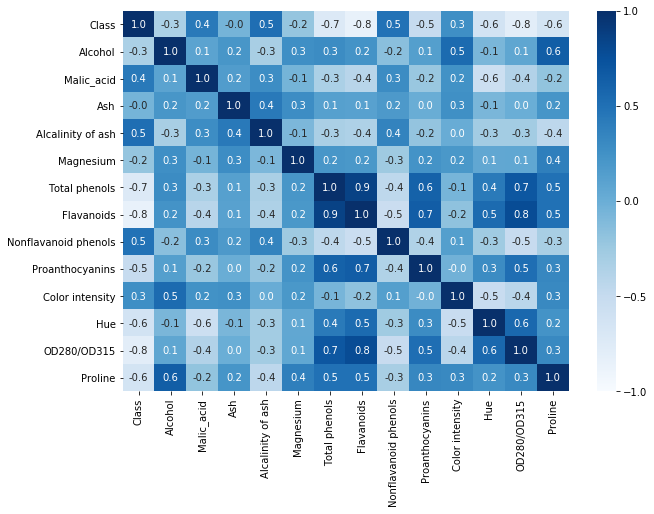

In [59]:
plot_features_correlation(df.rename(columns={'OD280/OD315 of diluted wines':'OD280/OD315'}))

# CLASSIFICATION MODEL

In [60]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport, ROCAUC
from yellowbrick.classifier import ClassBalance, ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
from yellowbrick.model_selection import ValidationCurve

## Prepare training and testing data for ML classification models

In [62]:
df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [103]:
X = df.drop(columns=['Class']).values
y = df['Class'].values - 1

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [105]:
X_train.shape

(142, 13)

In [106]:
np.bincount(y), np.unique(y)

(array([59, 71, 48]), array([0, 1, 2]))

## Model Evaluation, Selection and Hyperparameter optimization
- https://www.scikit-yb.org/en/latest/tutorial.html

### Single Decesion Tree

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


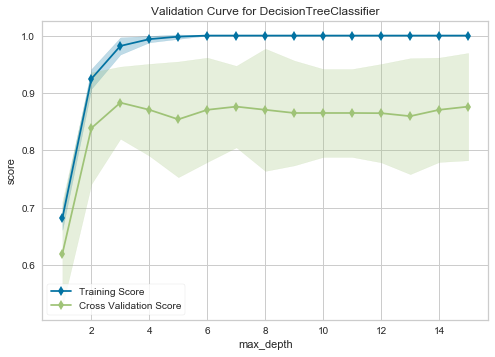

In [66]:
sizes = np.linspace(0.3, 1.0, 10)

param_range = np.arange(1, 16)
#cv = StratifiedKFold(10)

# Create the learning curve visualizer, fit and poof
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth", param_range=param_range,
    cv=10, scoring='accuracy', n_jobs=8)

viz.fit(X, y)
viz.poof()

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


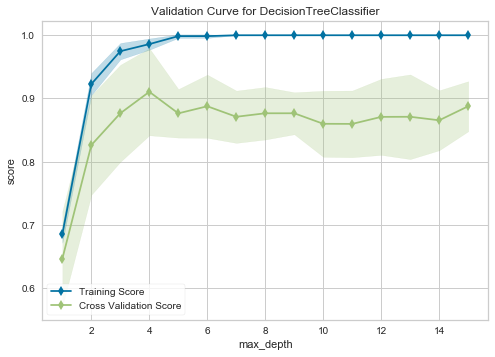

In [67]:
sizes = np.linspace(0.3, 1.0, 10)

param_range = np.arange(1, 16)
#cv = StratifiedKFold(10)

# Create the learning curve visualizer, fit and poof
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth", param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=8)

viz.fit(X, y)
viz.poof()

In [68]:
max_depth = 3

eval_scores = cross_val_score(DecisionTreeClassifier(max_depth=max_depth), X, y, scoring="accuracy", cv=10, n_jobs=11)
print("Decision Tree with depth {} - Accuracy score:".format(max_depth), np.mean(eval_scores))

Decision Tree with depth 3 - Accuracy score: 0.8663398692810457


In [69]:
max_depth = 4

eval_scores = cross_val_score(DecisionTreeClassifier(max_depth=max_depth), X, y, scoring="accuracy", cv=10, n_jobs=11)
print("Decision Tree with depth {} - Accuracy score:".format(max_depth), np.mean(eval_scores))

Decision Tree with depth 4 - Accuracy score: 0.8705882352941178


In [70]:
max_depth = 4

eval_scores = cross_val_score(DecisionTreeClassifier(max_depth=max_depth), X, y, scoring="accuracy", cv=5, n_jobs=11)
print("Decision Tree with depth {} - Accuracy score:".format(max_depth), np.mean(eval_scores))

Decision Tree with depth 4 - Accuracy score: 0.8993650793650794


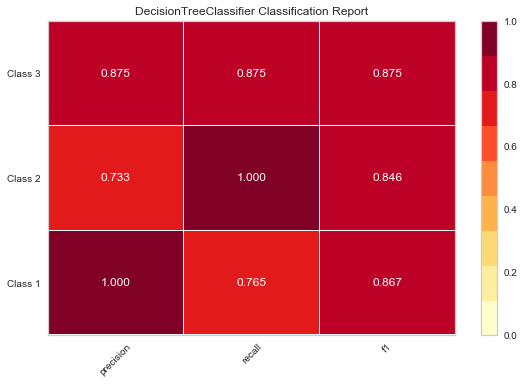

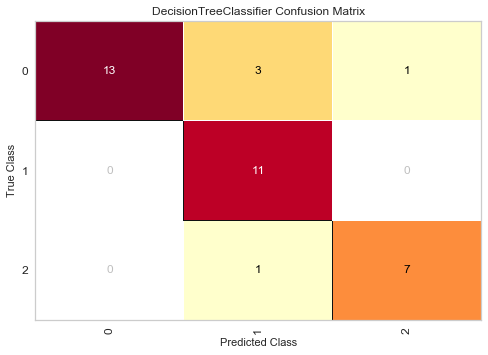

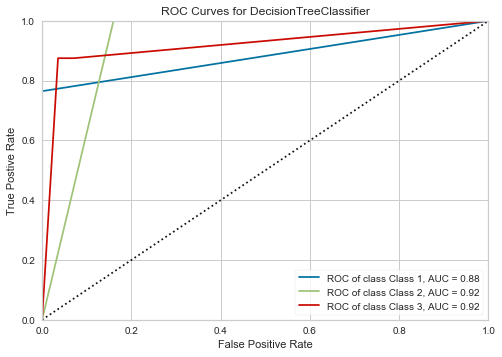

In [71]:
sel_max_depth=4

classes = ['Class 1', 'Class 2', 'Class 3']
from yellowbrick.base import VisualizerGrid
# Instantiate the classification model and visualizer
#model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=6)
model = DecisionTreeClassifier(max_depth=sel_max_depth)


cr = ClassificationReport(model, classes=classes)
cr.fit(X_train, y_train)  # Fit the visualizer and the model
cr.score(X_test, y_test)  # Evaluate the model on the test data
g = cr.poof() 

cm = ConfusionMatrix(model)
#cm.fit(X_train, y_train)
cm.score(X_test, y_test)
g = cm.poof()

rocauc = ROCAUC(model, classes=classes, micro=False, macro=False)
#rocauc.fit(X_train, y_train)  # Fit the training data to the visualizer
rocauc.score(X_test, y_test)  # Evaluate the model on the test data
g = rocauc.poof()             # Draw/show/poof the data


In [72]:
model.score(X_test, y_test)

0.8611111111111112

In [73]:
pd.DataFrame(list(zip(df.drop(columns=['Class']).columns,  model.feature_importances_)), \
             columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

feature  importance
12                       Proline    0.418933
9                Color intensity    0.392487
0                        Alcohol    0.059968
6                     Flavanoids    0.045102
10                           Hue    0.034429
8                Proanthocyanins    0.021988
4                      Magnesium    0.016491
2                            Ash    0.010601
1                     Malic_acid    0.000000
3              Alcalinity of ash    0.000000
5                  Total phenols    0.000000
7           Nonflavanoid phenols    0.000000
11  OD280/OD315 of diluted wines    0.000000

## Decision Tree visualization
- https://explained.ai/decision-tree-viz/
- https://colab.research.google.com/github/parrt/dtreeviz/blob/master/notebooks/examples.ipynb

In [74]:
#pip install pydot
import sklearn.tree
#from sklearn.tree import export_graphviz
import graphviz
import pydot

In [75]:
feature_names = df.drop(columns=['Class']).columns
class_names = ['Class 1', 'Class 2', 'Class 3']
dot_data = sklearn.tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

In [76]:
pydot.graph_from_dot_data(dot_data)[0].write_pdf("wine_dt_depth4.pdf")

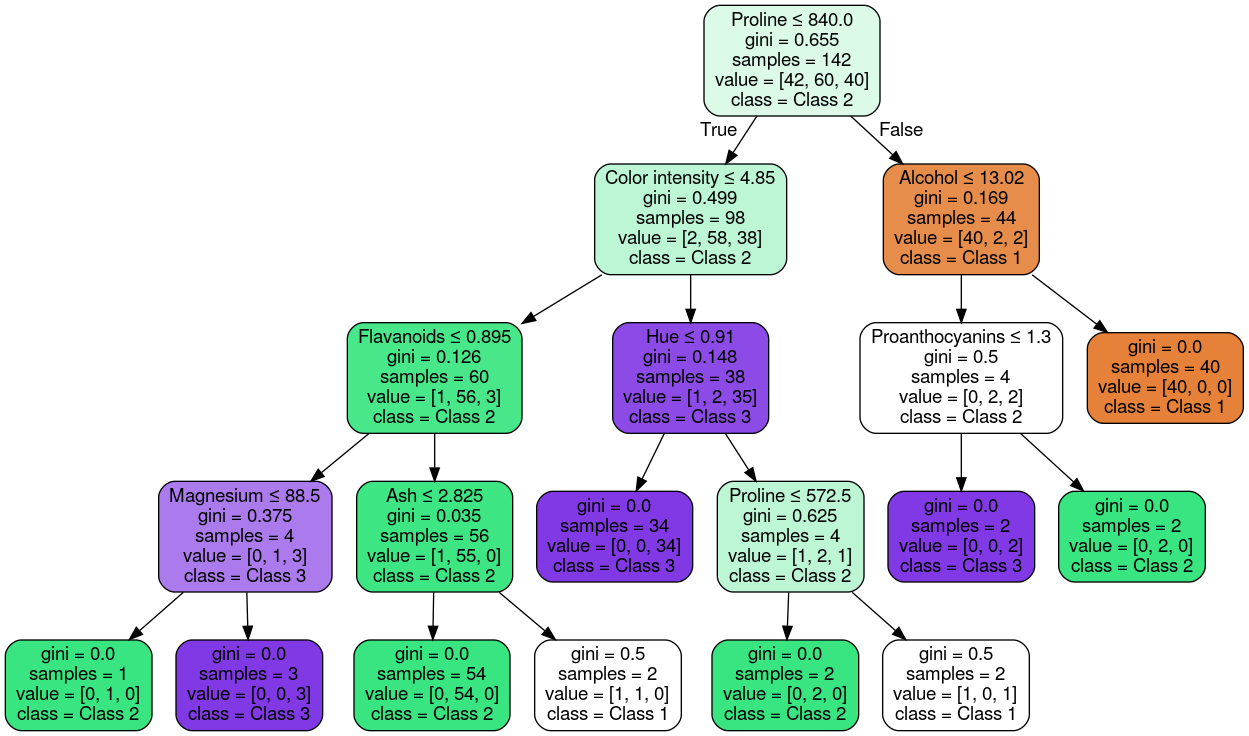

In [77]:
from IPython.display import Image, display_svg
Image(pydot.graph_from_dot_data(dot_data)[0].create_png())

In [78]:
np.mean(cross_val_score(DecisionTreeClassifier(max_depth=4, random_state=0), X, y, cv=5, scoring='accuracy'))

0.916031746031746

In [79]:
from dtreeviz.trees import *

In [80]:
X.shape

(178, 13)

In [81]:
class_names

['Class 1', 'Class 2', 'Class 3']

In [82]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

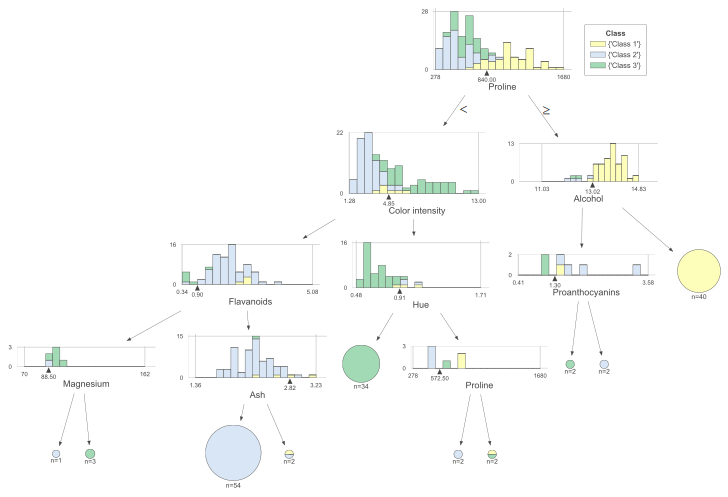

In [83]:
viz = dtreeviz(model, 
               X, 
               y,
               target_name='Class',
               feature_names=feature_names, 
               class_names={0:{"Class 1"}, 1:{"Class 2"}, 2:{"Class 3"}})  
              
#viz.view()
viz

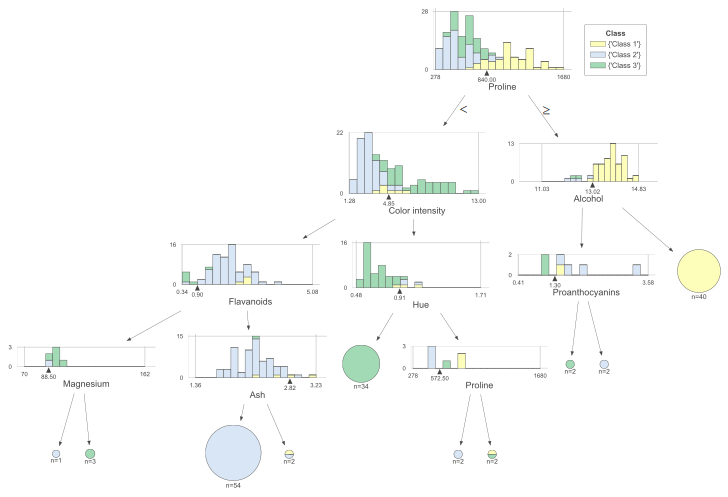

In [84]:
viz

## Random Forest

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


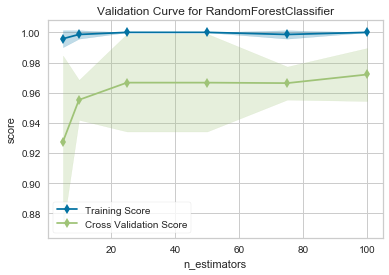

In [319]:
from yellowbrick.model_selection import ValidationCurve

param_range = [5, 10, 25, 50, 75, 100]
cv = StratifiedKFold(5)

# Create the learning curve visualizer, fit and poof
viz = ValidationCurve(
    RandomForestClassifier(max_depth=4), param_name="n_estimators", param_range=param_range,
    cv=cv, scoring='accuracy', n_jobs=8)

viz.fit(X, y)
viz.poof()

## Only sklearn

In [86]:
from sklearn.metrics import classification_report

In [286]:
sel_max_depth = 4
model = DecisionTreeClassifier(max_depth=sel_max_depth, random_state=0)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

class_names = ['Class 1', 'Class 2', 'Class 3']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Class 1       1.00      0.76      0.87        17
     Class 2       0.73      1.00      0.85        11
     Class 3       0.88      0.88      0.88         8

    accuracy                           0.86        36
   macro avg       0.87      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



# Selected model -  ExtraTreesClassifier

In [318]:
ExtraTreesClassifier()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


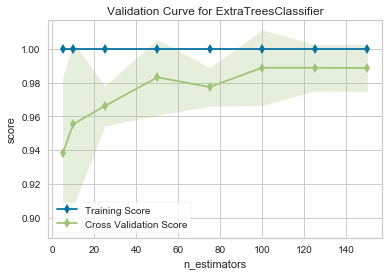

In [307]:
param_range = [5, 10, 25, 50, 75, 100, 125, 150]
cv = StratifiedKFold(5)

# Create the learning curve visualizer, fit and poof
viz = ValidationCurve(
    ExtraTreesClassifier(), param_name="n_estimators", param_range=param_range,
    cv=cv, scoring='accuracy', n_jobs=8)

viz.fit(X, y)
viz.poof()

In [312]:
n_estimators_parameter = 100
model = ExtraTreesClassifier(n_estimators=n_estimators_parameter, random_state=0)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

class_names = ['Class 1', 'Class 2', 'Class 3']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        17
     Class 2       1.00      1.00      1.00        11
     Class 3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



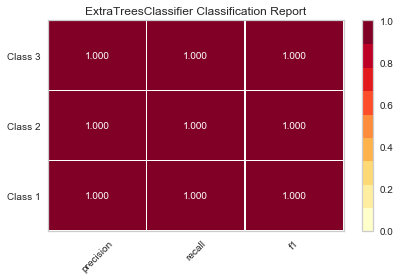

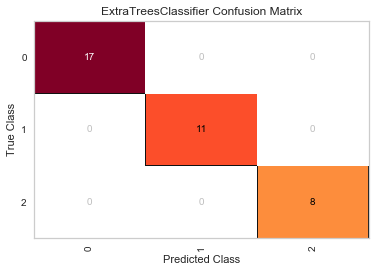

In [317]:
classes = ['Class 1', 'Class 2', 'Class 3']
from yellowbrick.base import VisualizerGrid
# Instantiate the classification model and visualizer

cr = ClassificationReport(model, classes=classes)
cr.fit(X_train, y_train)  # Fit the visualizer and the model
cr.score(X_test, y_test)  # Evaluate the model on the test data
g = cr.poof() 

cm = ConfusionMatrix(model)
cm.score(X_test, y_test)
g = cm.poof()

In [313]:
pd.DataFrame(list(zip(df.drop(columns=['Class']).columns,  model.feature_importances_)), \
             columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

feature  importance
12                       Proline    0.158784
0                        Alcohol    0.138674
9                Color intensity    0.126523
6                     Flavanoids    0.114035
11  OD280/OD315 of diluted wines    0.108069
10                           Hue    0.098770
5                  Total phenols    0.058589
3              Alcalinity of ash    0.039764
1                     Malic_acid    0.038864
7           Nonflavanoid phenols    0.031665
8                Proanthocyanins    0.031583
4                      Magnesium    0.028413
2                            Ash    0.026268

In [ ]:
# domaca zadaca ovdje :)

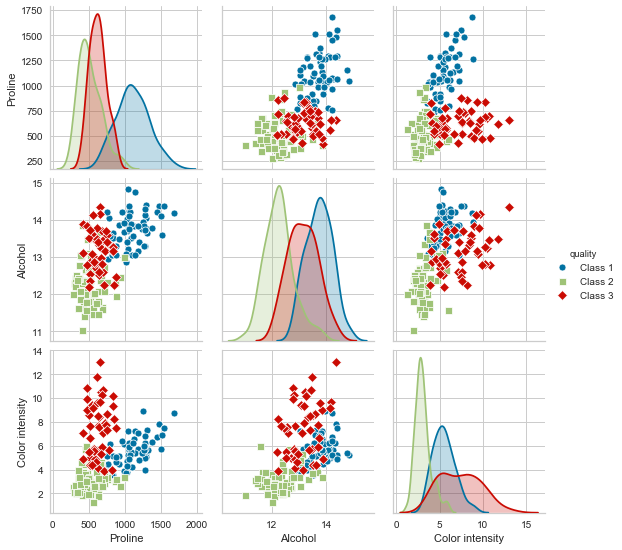

In [320]:
c = df['Class'].map(lambda x: 'Class {}'.format(x))
g = sns.pairplot(df[col_names[1:]].assign(quality=c),\
                 hue='quality',\
                 markers=["o", "s", "D"],\
                vars=['Proline', 'Alcohol', 'Color intensity'])
#3 most important features

In [88]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

## TRY AND EVALUATE OTHER MODELS

In [89]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

In [90]:
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.LinearSVC(max_iter=2000)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.69      0.82      0.75        11
           2       1.00      1.00      1.00         8

    accuracy                           0.83        36
   macro avg       0.85      0.86      0.85        36
weighted avg       0.84      0.83      0.84        36



In [91]:
anova_filter = SelectKBest(f_regression, k=4)
# 2) svm
clf = svm.LinearSVC(max_iter=2000)
anova_svm = make_pipeline(anova_filter, StandardScaler(), clf)
anova_svm.fit(X_train, y_train)
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.69      0.82      0.75        11
           2       1.00      1.00      1.00         8

    accuracy                           0.83        36
   macro avg       0.85      0.86      0.85        36
weighted avg       0.84      0.83      0.84        36



# OTHER ANALYSIS OF WINE DATASETS
- https://github.com/sumukhakaparthi/Wine-Quality/blob/master/Wine%20Quality.ipynb
- https://github.com/jcabralc/wine-dataset/blob/master/Wine%20Data%20Set.ipynb
- https://github.com/heeseungp/WineQualityUsingML
- https://github.com/pligor/predicting_quality_of_red_wine/blob/master/classify_wine_quality-with-upsampling.ipynb
- https://github.com/luiseduardogfranca/classifying-wine/blob/master/classinfying-wine-keras.ipynb

# CHOOSING THE MODEL

In [172]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier


models = [
    SVC(gamma='auto'), LinearSVC(), 
    KNeighborsClassifier(),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X_train, y_train, X_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    
    model = estimator

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train, **kwargs)

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{} f1: {}".format(estimator.__class__.__name__, f1_score(expected, predicted, average='weighted')))
    print("{} accuracy: {}".format(estimator.__class__.__name__, accuracy_score(expected, predicted)))

for model in models:
    score_model(X_train, y_train, X_test, y_test, model)

SVC f1: 0.19551798174986582
SVC accuracy: 0.3333333333333333
LinearSVC f1: 0.7977613809751543
LinearSVC accuracy: 0.8055555555555556
KNeighborsClassifier f1: 0.6695256660168941
KNeighborsClassifier accuracy: 0.6666666666666666
BaggingClassifier f1: 0.8891534391534393
BaggingClassifier accuracy: 0.8888888888888888


/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ExtraTreesClassifier f1: 1.0
ExtraTreesClassifier accuracy: 1.0
RandomForestClassifier f1: 1.0
RandomForestClassifier accuracy: 1.0


In [165]:
models

[SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


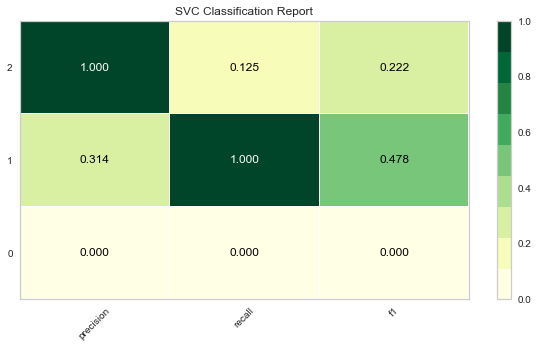

/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


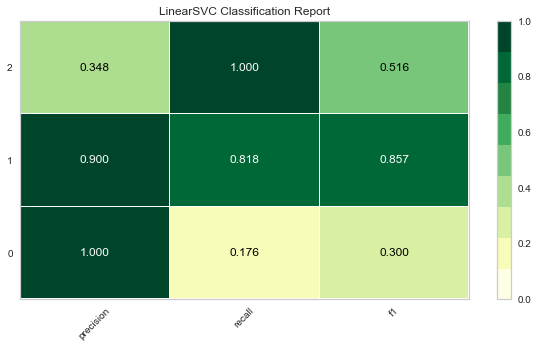

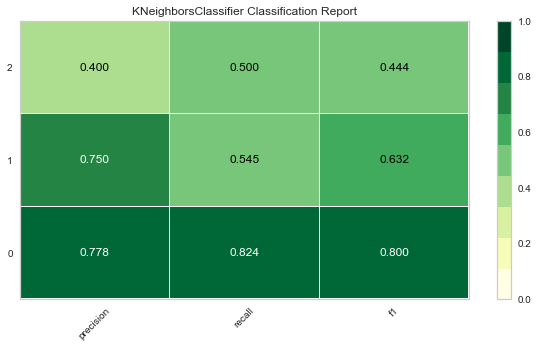

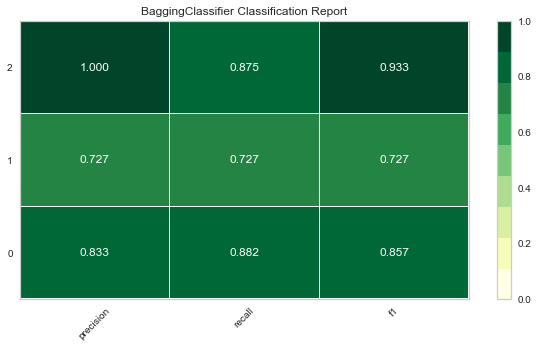

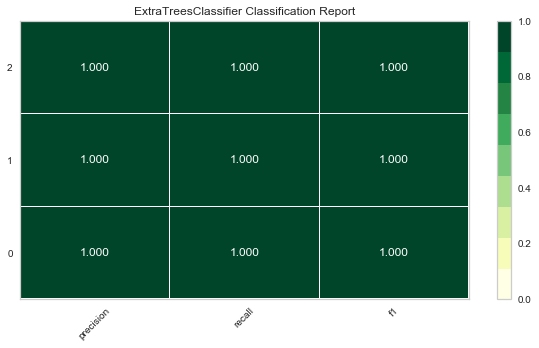

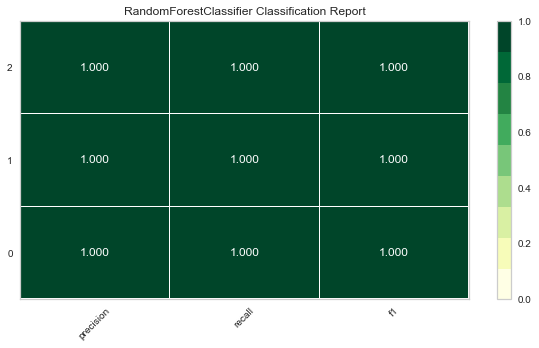

In [174]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X_train, y_train, X_test, y_test, estimator, **kwargs):
    """
    Test various estimators.
    """
    
    model = estimator

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=[0, 1, 2],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.poof()
    #print(model)

for model in models:
    visualize_model(X_train, y_train, X_test, y_test, model)